Date: 03/05/2025
Author: Seyed A. Banihashemi
Purpose:  Initial Exploratory analysis of the alzheimers dataset from kaggle. 

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
df_train = pd.read_csv("../data/kaggle_train.csv") 
#df_train.head()
df_train.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,...,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,5822.347877,74.960442,0.500291,0.698080,1.283304,27.687408,0.286795,9.978133,4.942195,4.972312,...,5.069688,0.205934,0.156486,4.970744,0.201280,0.158813,0.148342,0.161722,0.296684,0.353112
std,620.850386,9.065000,0.500145,0.994836,0.904339,7.209284,0.452396,5.777363,2.827319,2.900920,...,2.890435,0.404500,0.363422,2.947606,0.401073,0.365608,0.355542,0.368303,0.456929,0.478076
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5292.500000,67.000000,0.000000,0.000000,1.000000,21.641242,0.000000,5.137582,2.612521,2.415726,...,2.562307,0.000000,0.000000,2.324166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5820.000000,75.000000,1.000000,0.000000,1.000000,27.919813,0.000000,9.805564,4.801357,5.050778,...,5.098709,0.000000,0.000000,5.026306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6357.500000,83.000000,1.000000,1.000000,2.000000,33.842594,1.000000,15.181033,7.380416,7.480424,...,7.496824,0.000000,0.000000,7.583825,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.997203,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df_train.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [5]:
# Seperating features into subcategories

all_features = [   'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
               'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
               'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
               'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
               'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
               'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
               'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
               'Forgetfulness' , 'Diagnosis']
demo_features = ['Age', 'Gender', 'Ethnicity','EducationLevel','Diagnosis']
life_style_features = ['BMI','Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality','Diagnosis']
medic_hist_features = ['FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 'Hypertension','Diagnosis']
clinical_features = ['SystolicBP','DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL','CholesterolTriglycerides','Diagnosis']
cognitive_features = ['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL','Diagnosis']
symptoms_features = ['Confusion','Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness','Diagnosis']

no_cognitive = [item for item in all_features if item not in cognitive_features]
no_cognitive.append('Diagnosis')

subcategory_dict = {'all_features' : all_features,'demo':demo_features ,'lifestyle': life_style_features , 'medic' : medic_hist_features , 
                    'clinical':clinical_features , 'cognitive': cognitive_features , 'symptoms': symptoms_features , 'no_cognitive': no_cognitive}


### Correlation Heatmap

Here we record the correlation heatmap between the target feature `Diagnosis` and the rest of the features.

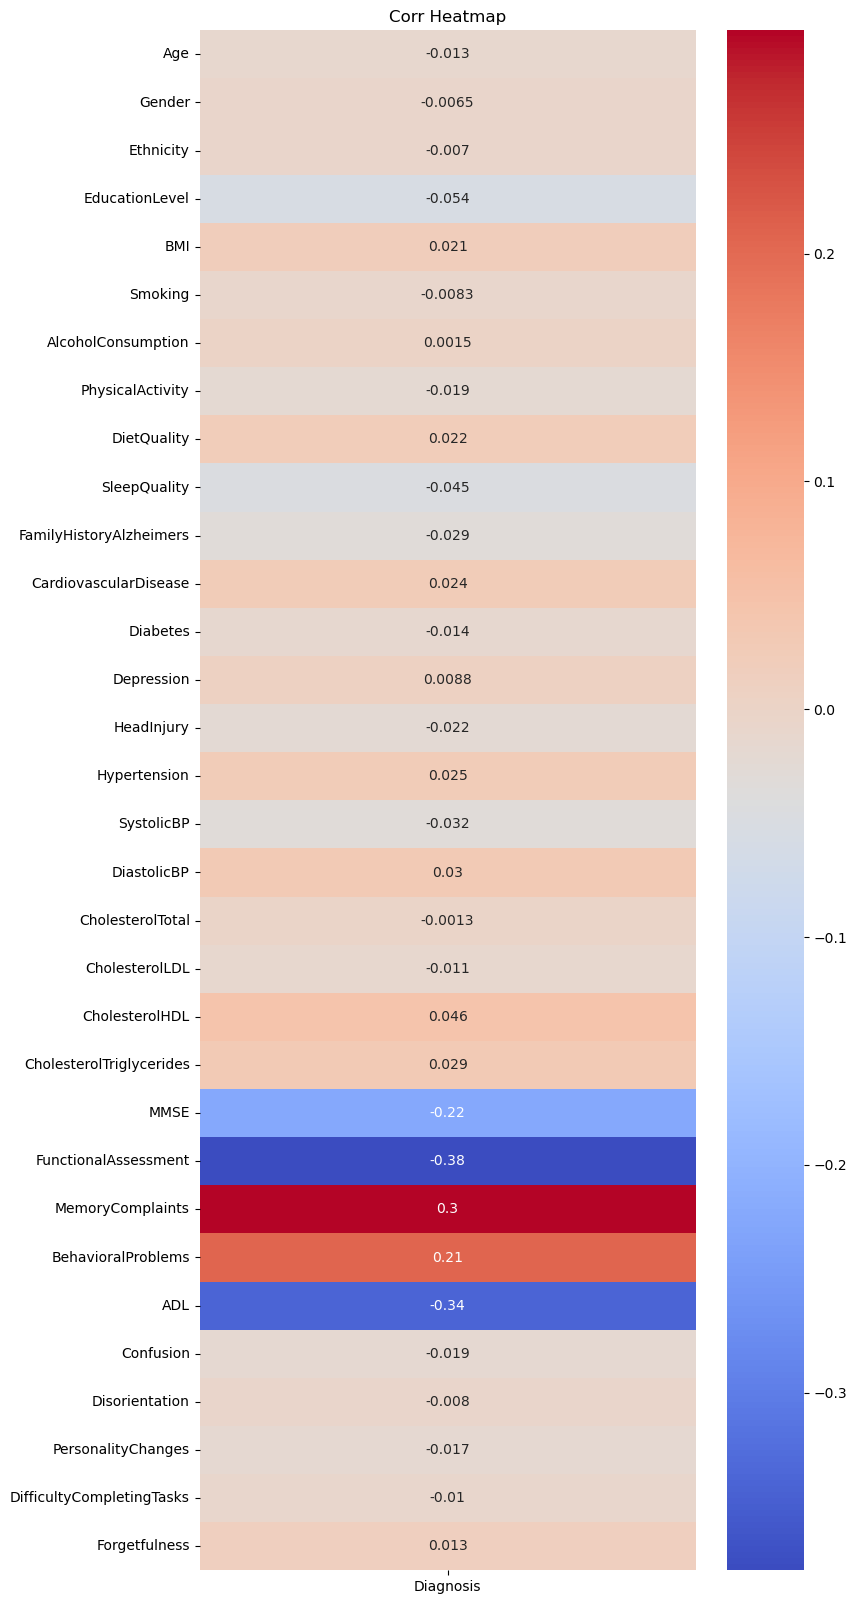

In [8]:
corr_with_diagnosis = df_train.drop(['DoctorInCharge', 'PatientID'] , axis=1).corr()['Diagnosis'].drop('Diagnosis').to_frame()
fig = plt.figure(figsize=(8,20))
sns.heatmap(corr_with_diagnosis , annot=True, cmap='coolwarm' , cbar=True)
plt.title('Corr Heatmap')
plt.show()

**Note:** The correlation between `Diagnosis` and Cognitive and Functional Assessment features is significantly more than other subcategories.

## Distribution of Demographic Features

- #### Histplots of demographic features based on `Diagnosis`.

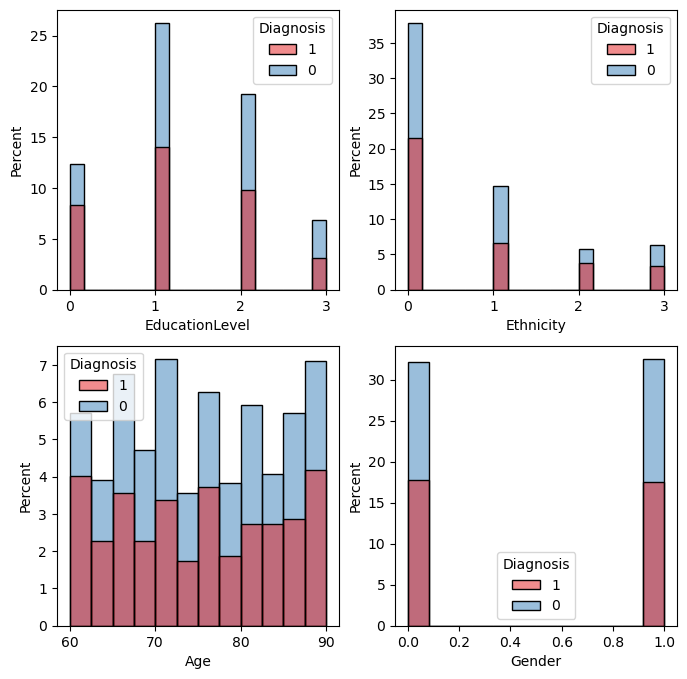

In [12]:
fig,axes = plt.subplots(2,2, figsize=(8,8))
sns.histplot(data=df_train, x='EducationLevel' , hue='Diagnosis', stat='percent' ,ax=axes[0,0],hue_order=[1,0], palette='Set1')
sns.histplot(data=df_train, x='Ethnicity' , hue='Diagnosis' ,stat='percent', ax=axes[0,1],hue_order=[1,0], palette='Set1')
sns.histplot(data=df_train, x='Age' , hue='Diagnosis' ,stat='percent', ax=axes[1,0],hue_order=[1,0], palette='Set1')
sns.histplot(data=df_train, x='Gender' , hue='Diagnosis' ,stat='percent', ax=axes[1,1],hue_order=[1,0], palette='Set1')

plt.show()

- #### Countplots of demographic features based on `Diagnosis`.

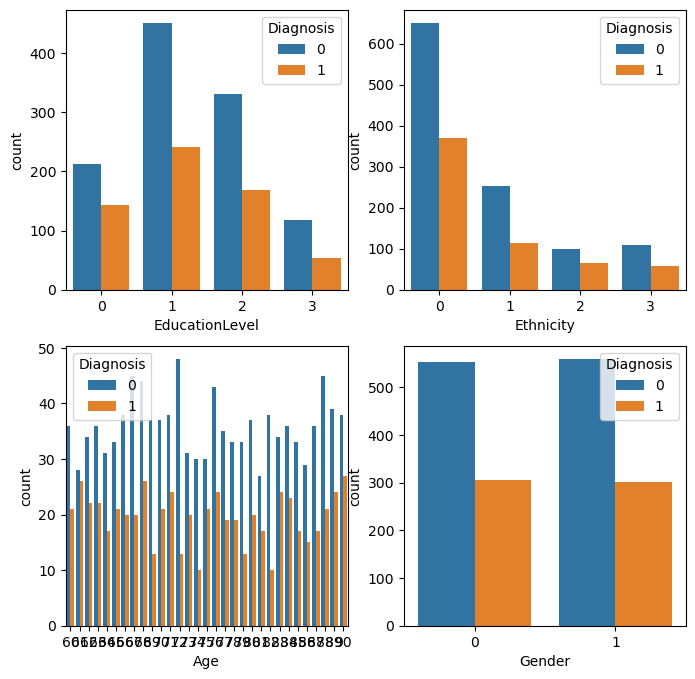

In [14]:
fig,axes = plt.subplots(2,2, figsize=(8,8))
sns.countplot(data=df_train, x='EducationLevel' , hue='Diagnosis',ax=axes[0,0])
sns.countplot(data=df_train, x='Ethnicity' , hue='Diagnosis', ax=axes[0,1])
sns.countplot(data=df_train, x='Age' , hue='Diagnosis' , ax=axes[1,0])
sns.countplot(data=df_train, x='Gender' , hue='Diagnosis' , ax=axes[1,1])

plt.show()

- #### Violinplot for the numeric feature `Age`. 

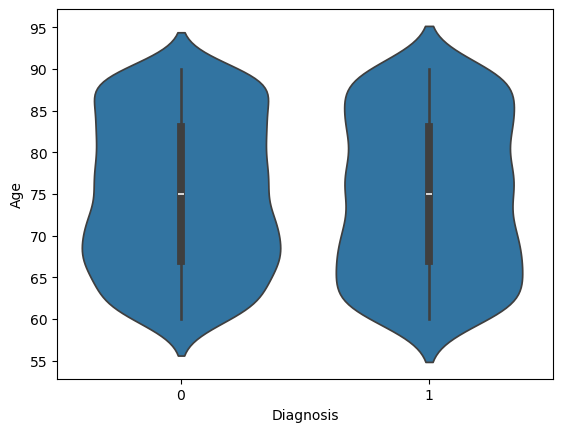

In [16]:
sns.violinplot(data = df_train , x='Diagnosis' , y='Age')
plt.show()

- #### Distribution table of `Diagnosis` with respect to `EducationLevel`. 

In [18]:
df_train.groupby(['EducationLevel'])['Diagnosis'].value_counts(normalize=True)

EducationLevel  Diagnosis
0               0            0.595506
                1            0.404494
1               0            0.651734
                1            0.348266
2               0            0.663327
                1            0.336673
3               0            0.686047
                1            0.313953
Name: proportion, dtype: float64

**Note:** Positive diagnosis percentage decreases as the Education Level increases.

- #### Distribution table of `Diagnosis` with respect to `Gender`.

In [21]:
df_train.groupby(['Gender'])['Diagnosis'].value_counts(normalize=True)

Gender  Diagnosis
0       0            0.643772
        1            0.356228
1       0            0.650000
        1            0.350000
Name: proportion, dtype: float64

- #### Distribution table of `Diagnosis` with respect to `Ethnicity`.

In [23]:
df_train.groupby(['Ethnicity'])['Diagnosis'].value_counts(normalize=True)

Ethnicity  Diagnosis
0          0            0.637255
           1            0.362745
1          0            0.688525
           1            0.311475
2          0            0.606061
           1            0.393939
3          0            0.654762
           1            0.345238
Name: proportion, dtype: float64

## Distribution of Lifestyle Factors

- #### Violinplots for Lifestyle features based on `Diagnosis`

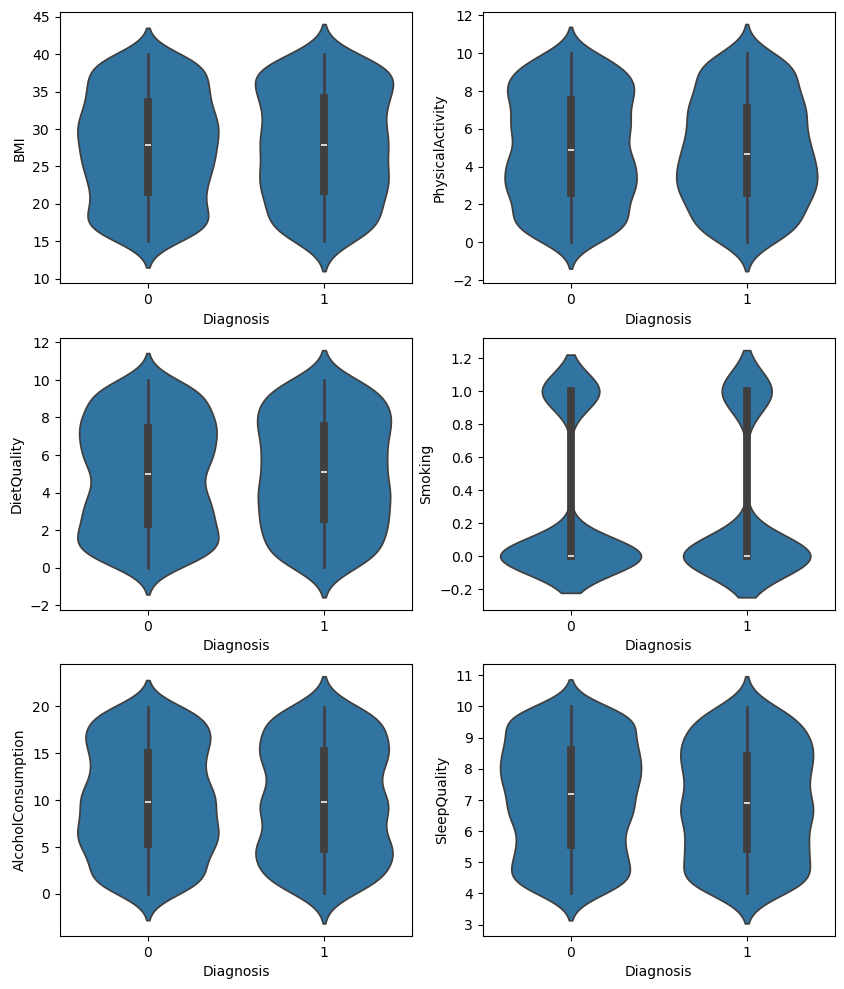

In [26]:
fig,axes = plt.subplots(3,2, figsize=(10,12))

for i in range(6):
    sns.violinplot(data=df_train , x= 'Diagnosis' , y = life_style_features[i] , ax=axes[i%3 , i%2])

plt.show()

- #### Countplot for the distribution of the categorical feature `Smoking` based on `Diagnosis`

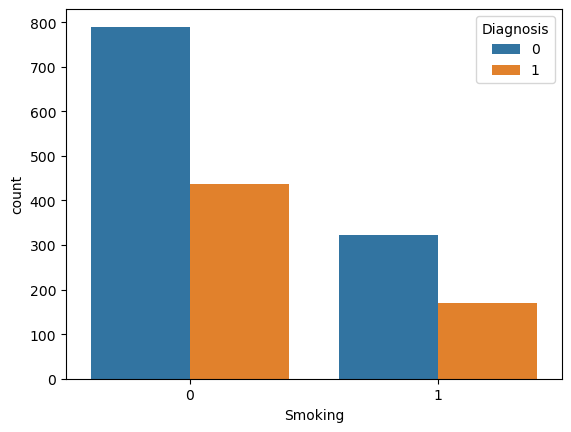

In [28]:
sns.countplot(data = df_train , x='Smoking' , hue= 'Diagnosis')
plt.show()

- #### Distribution table for `Diagnosis` with respect to `Smoking`

In [30]:
df_train.groupby(['Smoking'])['Diagnosis'].value_counts(normalize=True)

Smoking  Diagnosis
0        0            0.644372
         1            0.355628
1        0            0.653144
         1            0.346856
Name: proportion, dtype: float64

## Distribution of Medical History Features

- #### Countplots for Medical History features based on `Diagnosis`

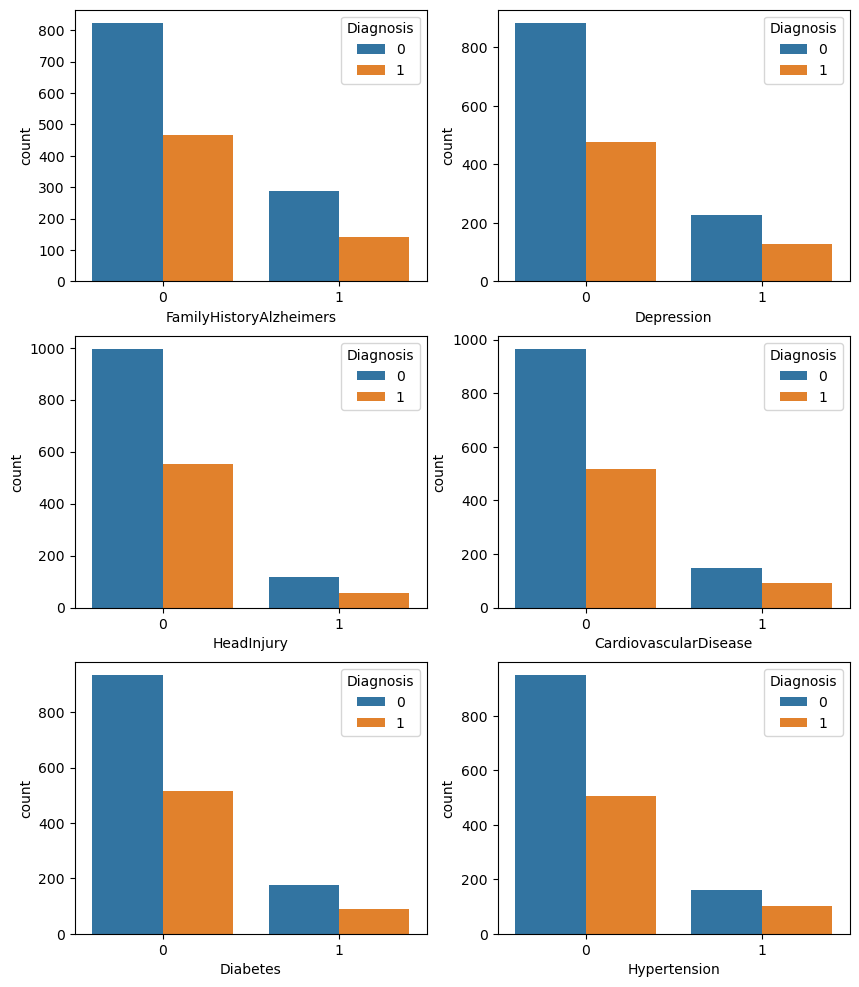

In [33]:
fig,axes = plt.subplots(3,2, figsize=(10,12))

for i in range(6):
    sns.countplot(data=df_train , hue= 'Diagnosis' , x = medic_hist_features[i] , ax=axes[i%3 , i%2])

plt.show()

- #### Distribution table for `Diagnosis` with respect to Medical History features

In [35]:
for i in range(6):
    print(df_train.groupby([medic_hist_features[i]])['Diagnosis'].value_counts(normalize=True))

FamilyHistoryAlzheimers  Diagnosis
0                        0            0.638760
                         1            0.361240
1                        0            0.671329
                         1            0.328671
Name: proportion, dtype: float64
CardiovascularDisease  Diagnosis
0                      0            0.651382
                       1            0.348618
1                      0            0.618644
                       1            0.381356
Name: proportion, dtype: float64
Diabetes  Diagnosis
0         0            0.643939
          1            0.356061
1         0            0.662921
          1            0.337079
Name: proportion, dtype: float64
Depression  Diagnosis
0           0            0.649046
            1            0.350954
1           0            0.638655
            1            0.361345
Name: proportion, dtype: float64
HeadInjury  Diagnosis
0           0            0.643411
            1            0.356589
1           0            0.678363
  

## Distribution of Clinical Measurements features

- #### Violinplots for Clinical Measurement features based on `Diagnosis`

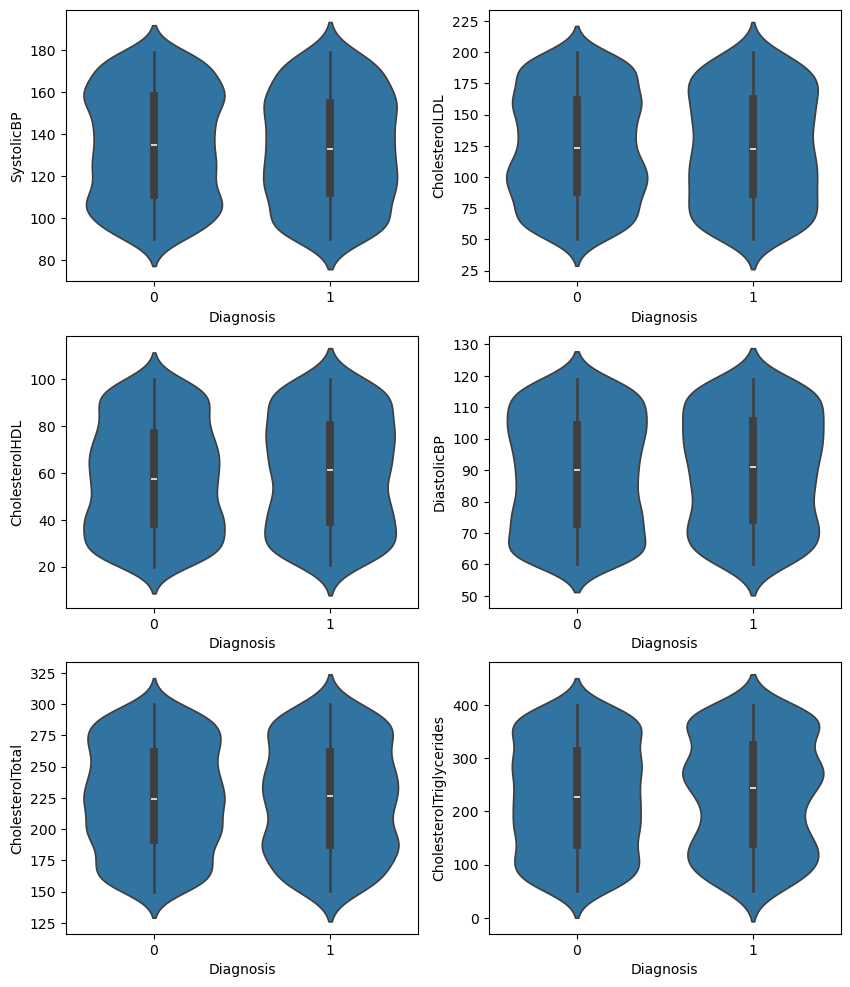

In [38]:
fig,axes = plt.subplots(3,2, figsize=(10,12))

for i in range(6):
    sns.violinplot(data=df_train , x= 'Diagnosis' , y = clinical_features[i] , ax=axes[i%3 , i%2])

plt.show()

## Distribution of Cognitive and Functional Assessments features

- #### Violinplots for numeric features within the subcategory of Cognitive features based on `Diagnosis`

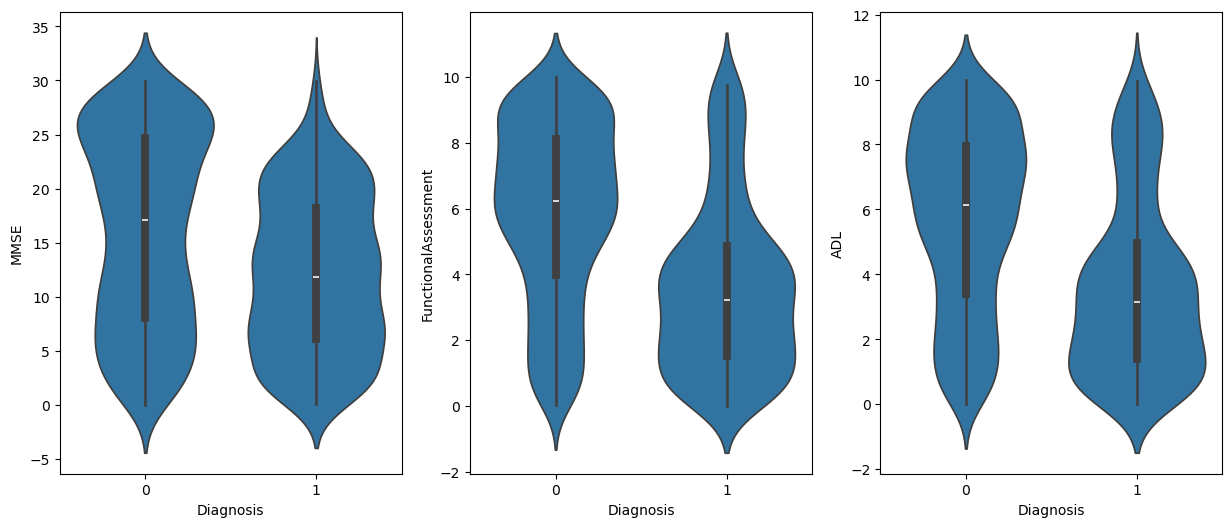

In [41]:
fig,axes = plt.subplots(1,3,figsize=(15,6))

sns.violinplot(data= df_train , x='Diagnosis' , y='MMSE' , ax=axes[0])
sns.violinplot(data= df_train , x='Diagnosis' , y='FunctionalAssessment' , ax=axes[1])
sns.violinplot(data= df_train , x='Diagnosis' , y='ADL' , ax=axes[2])

plt.show()

**Note:** Patients with positive diagnosis typically have lower scores in cognitive numeric features `MMSE`, `FunctionalAssessment`, and `ADL`.

- #### Countplots for categorical features `MemoryComplaints` and `BehavorialProblems` based on `Diagnosis`

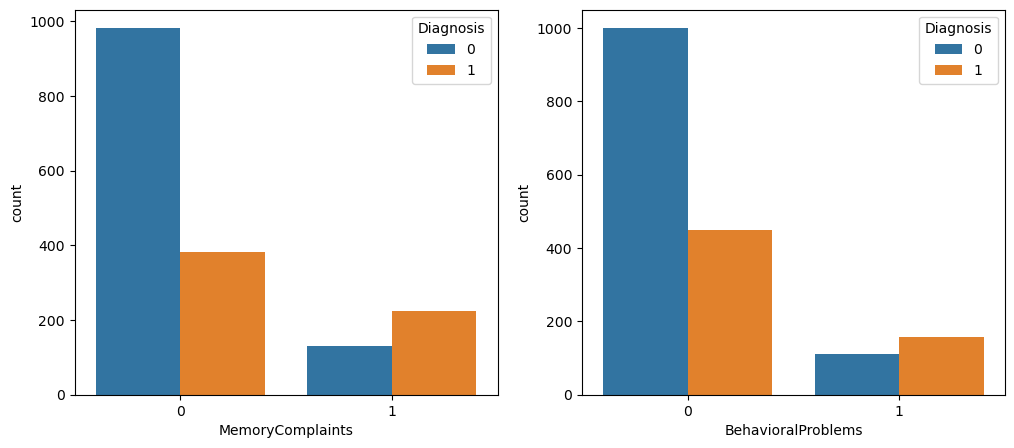

In [44]:
fig,axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data = df_train, hue='Diagnosis' , x='MemoryComplaints' , ax=axes[0] )
sns.countplot(data = df_train, hue='Diagnosis' , x='BehavioralProblems' , ax=axes[1] )
plt.show()

**Note:** Patients who have Memory Complaints and Behavioral Problems are significantly more likely to be positively diagnosed.

## Distribution of Symptoms features

- #### Countplots for Symptoms based on `Diagnosis` 

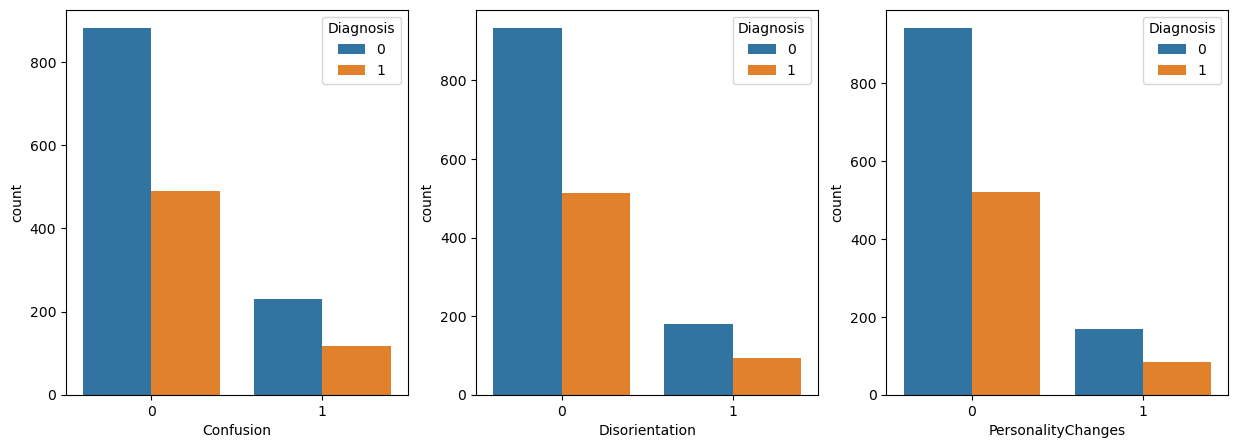

In [48]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(data = df_train, hue='Diagnosis' , x='Confusion' , ax=axes[0] )
sns.countplot(data = df_train, hue='Diagnosis' , x='Disorientation' , ax=axes[1] )
sns.countplot(data = df_train, hue='Diagnosis' , x='PersonalityChanges' , ax=axes[2] )
plt.show()

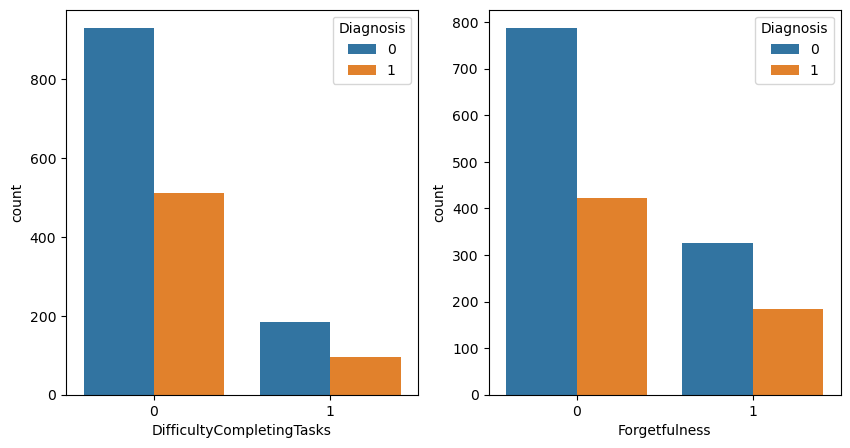

In [49]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.countplot(data = df_train, hue='Diagnosis' , x='DifficultyCompletingTasks' , ax=axes[0] )
sns.countplot(data = df_train, hue='Diagnosis' , x='Forgetfulness' , ax=axes[1] )
plt.show()

In [50]:
for i in range(5):
    print(df_train.groupby([symptoms_features[i]])['Diagnosis'].value_counts(normalize=True))

Confusion  Diagnosis
0          0            0.642389
           1            0.357611
1          0            0.664740
           1            0.335260
Name: proportion, dtype: float64
Disorientation  Diagnosis
0               0            0.645228
                1            0.354772
1               0            0.655678
                1            0.344322
Name: proportion, dtype: float64
PersonalityChanges  Diagnosis
0                   0            0.643443
                    1            0.356557
1                   0            0.666667
                    1            0.333333
Name: proportion, dtype: float64
DifficultyCompletingTasks  Diagnosis
0                          0            0.644691
                           1            0.355309
1                          0            0.658273
                           1            0.341727
Name: proportion, dtype: float64
Forgetfulness  Diagnosis
0              0            0.650951
               1            0.349049
1      

## Confusion Matrices for Boolean Features vs Diagnosis

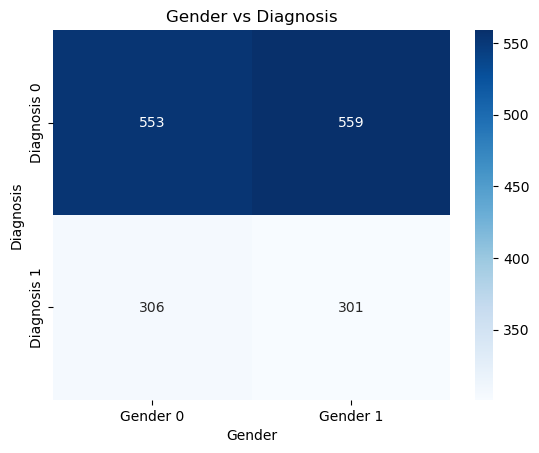

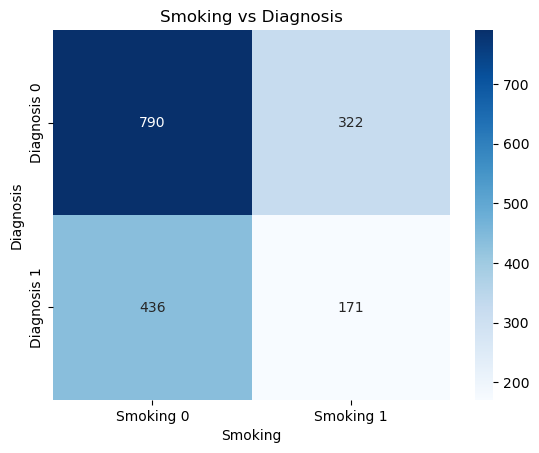

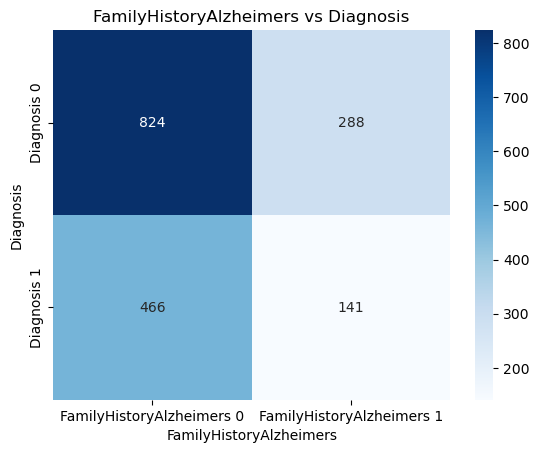

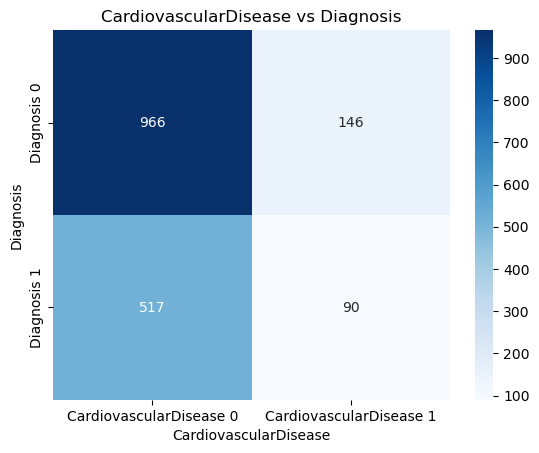

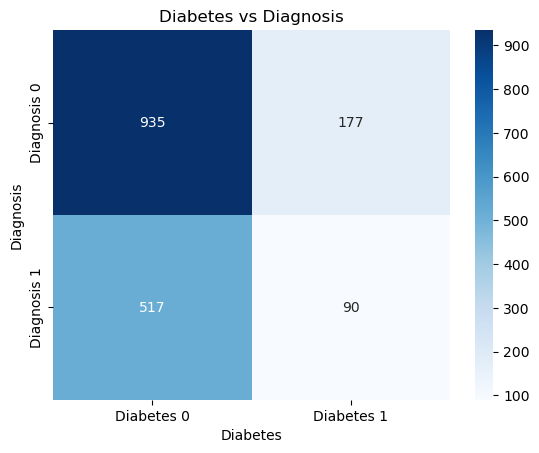

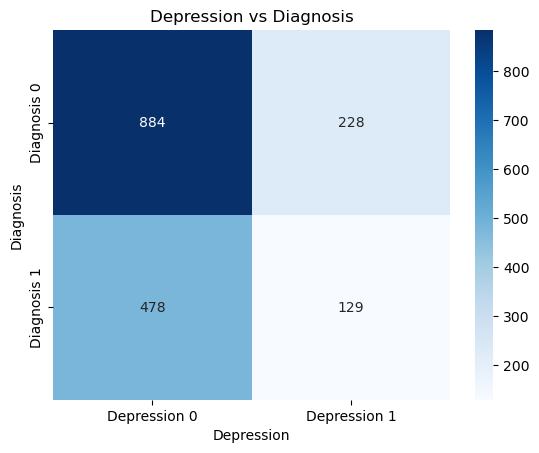

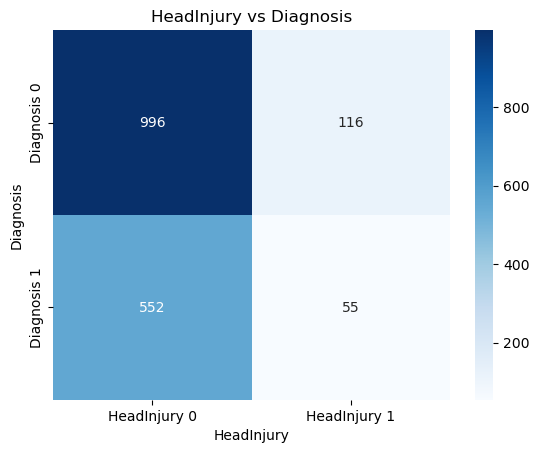

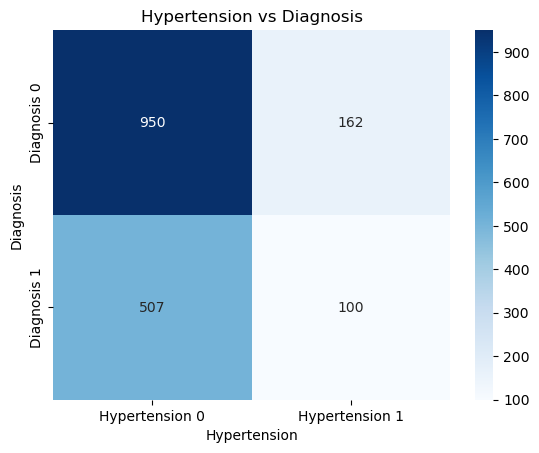

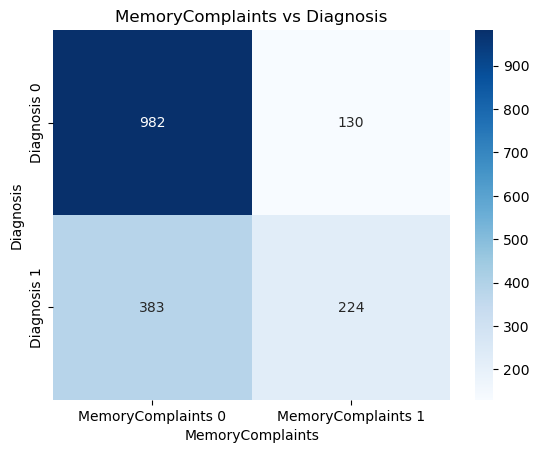

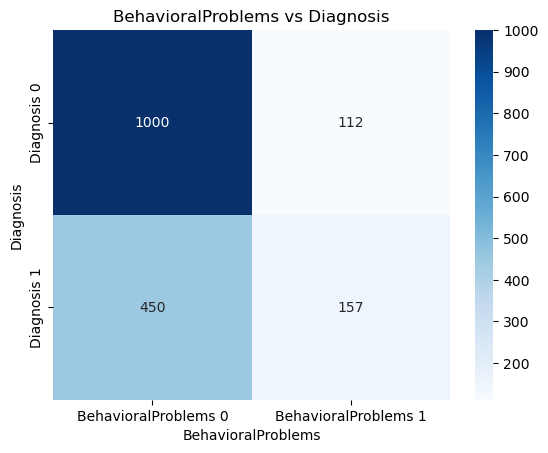

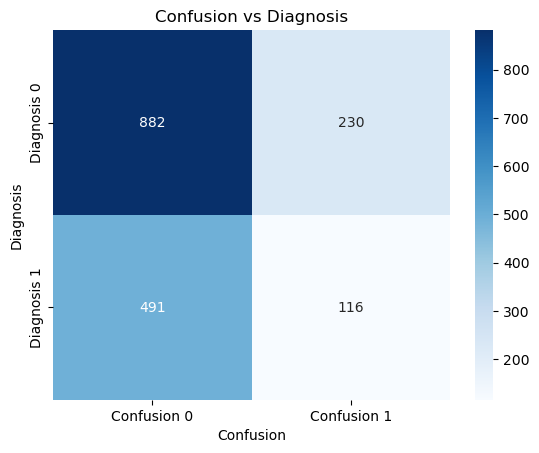

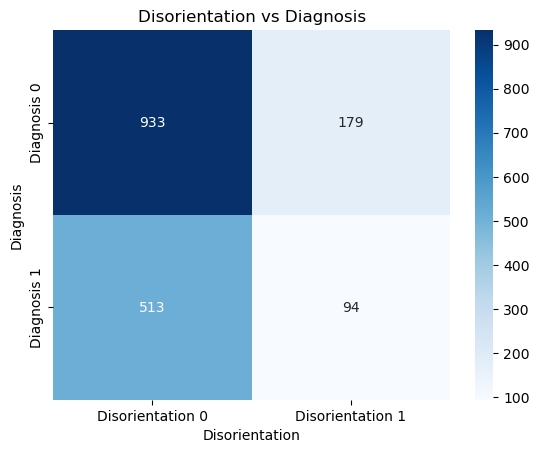

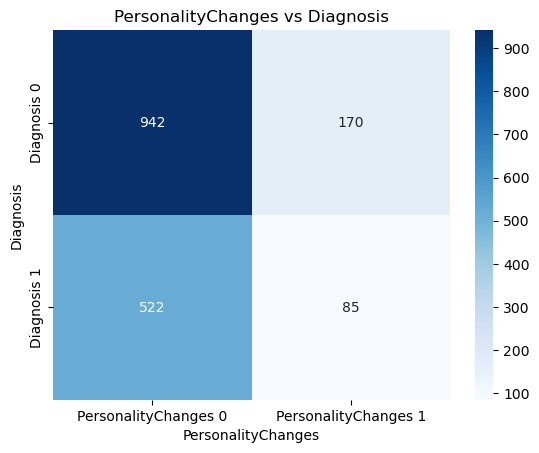

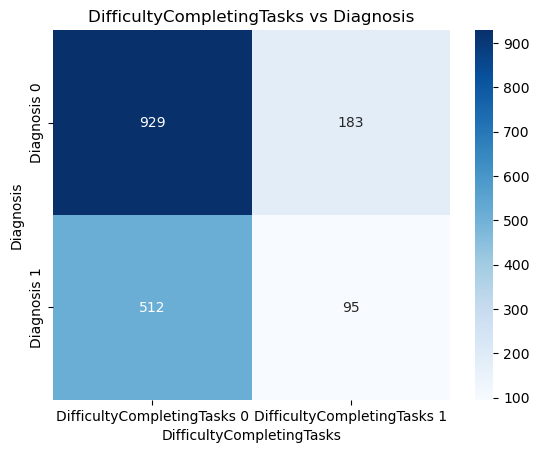

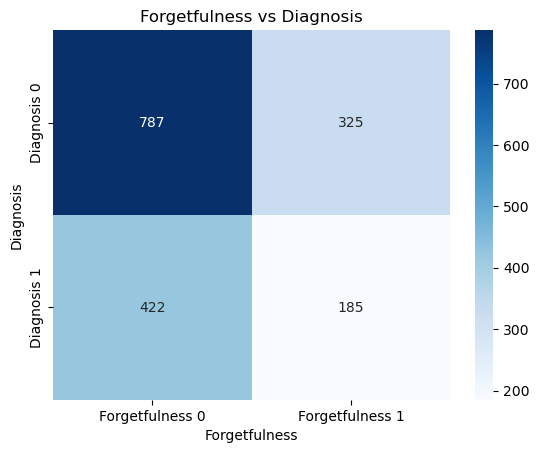

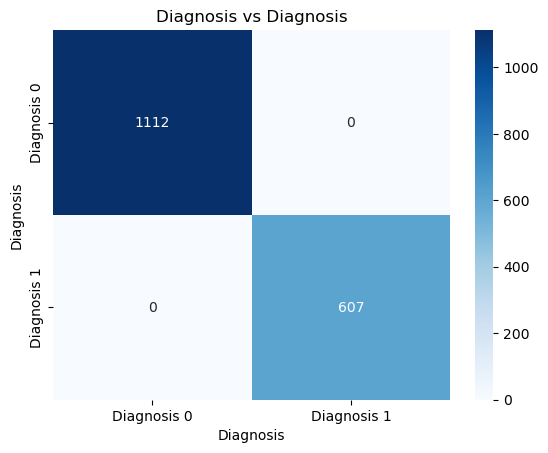

In [89]:
boolean_features = ['Gender' , 'Smoking' , 'FamilyHistoryAlzheimers' , 'CardiovascularDisease','Diabetes', 'Depression', 'HeadInjury', 
                    'Hypertension' ,'MemoryComplaints', 'BehavioralProblems' , 'Confusion','Disorientation', 'PersonalityChanges', 
                    'DifficultyCompletingTasks','Forgetfulness','Diagnosis' ]

confusion_matrices = {}
for item in boolean_features:
    confusion_matrices[item] = confusion_matrix(df_train.Diagnosis, df_train[item])
    sns.heatmap(confusion_matrices[item], annot=True, fmt="d", cmap="Blues", 
                xticklabels=[item+" 0", item+" 1"], yticklabels=["Diagnosis 0", "Diagnosis 1"])
    plt.xlabel(item)
    plt.ylabel("Diagnosis")
    plt.title(item+" vs Diagnosis")
    plt.show()

## A simple PCA Model



To visualize the relation between each subcategory of features with the target feature `Diagnosis`, I performed a simple 2-dimensional PCA regression for each subcategory and plotted the results with color coding based on `Diagnosis`. The data is processed through two pipelines: one with a scaling preprocessing and one without it. Since the scales of features are not the same and PCA is sensitive to scaling, the results are different; I have plotted the outcomes of both.  

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


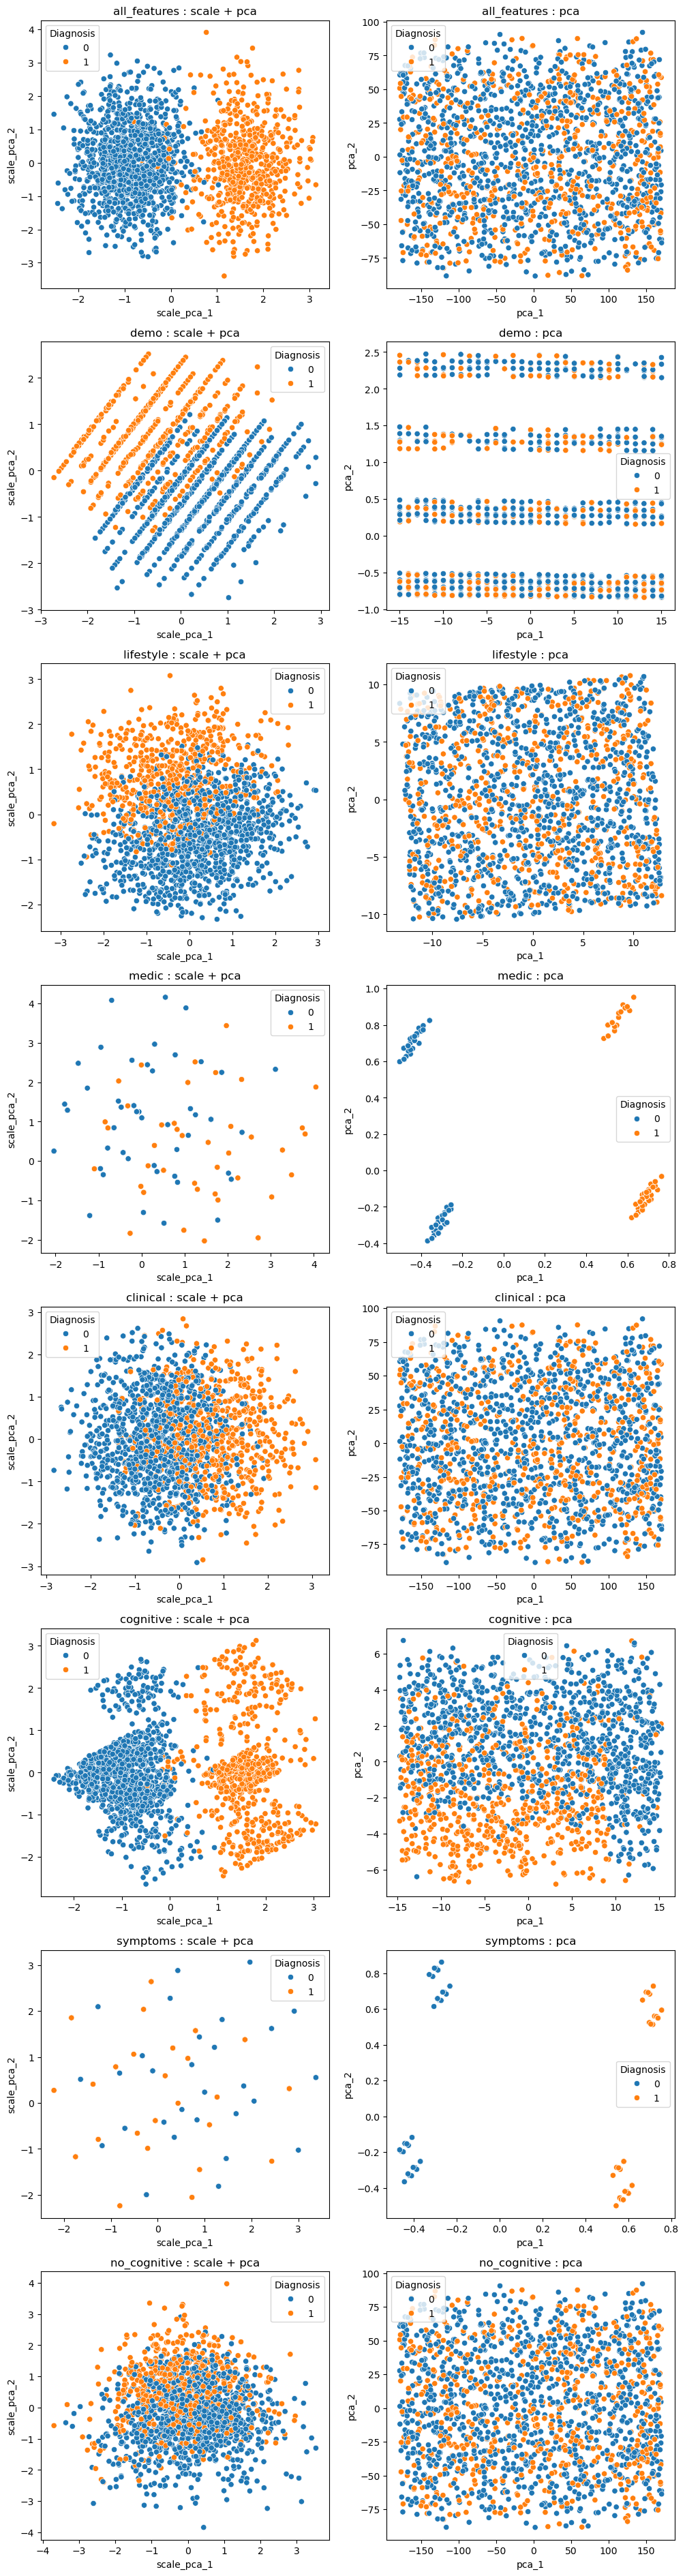

In [61]:
pipe_scale_pca = Pipeline([('scale', StandardScaler())
                 ,('pca', PCA(2))])
pipe_pca = Pipeline([('pca', PCA(2))])

fig,axes = plt.subplots(8,2 , figsize=(12,48))

i=0

for key in subcategory_dict:
    value = subcategory_dict[key]

    pipe_scale_pca.fit(df_train[value])
    fit_scale_pca = pipe_scale_pca.transform(df_train[value])

    pipe_pca.fit(df_train[value])
    fit_pca = pipe_pca.transform(df_train[value])
    
    df_value = pd.DataFrame({'Diagnosis':df_train.Diagnosis , 'scale_pca_1' : fit_scale_pca[:,0]  , 'scale_pca_2' : fit_scale_pca[:,1],
                             'pca_1' : fit_pca[:,0] , 'pca_2' : fit_pca[:,1]})

    sns.scatterplot(data=df_value , x='scale_pca_1' , y='scale_pca_2' , hue= 'Diagnosis' , ax=axes[i,0])
    axes[i,0].set_title(key + ' : scale + pca')

    sns.scatterplot(data=df_value , x='pca_1' , y='pca_2' , hue= 'Diagnosis' , ax=axes[i,1])
    axes[i,1].set_title(key + ' : pca')

    i=i+1

plt.show()

## KNN Regression

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import root_mean_squared_error

In [75]:
value_counts_dir= {}
success_rate_dict= {}

for key in subcategory_dict:

    value = subcategory_dict[key]
    
    # Prediction using scaling in the pipeline
    pipe_scale_knn.fit(df_knn_train[value].drop('Diagnosis' , axis=1),df_knn_train.Diagnosis)
    pred_scale_knn = pipe_scale_knn.predict(df_knn_test[value].drop('Diagnosis' , axis=1))
    
    # Prediction NOT using scaling in the pipeline
    pipe_knn.fit(df_knn_train[value].drop('Diagnosis' , axis=1),df_knn_train.Diagnosis)
    pred_knn = pipe_knn.predict(df_knn_test[value].drop('Diagnosis' , axis=1))
    
    
    df_pred = pd.DataFrame({ 'Diagnosis' : df_knn_test.Diagnosis ,  
                                        'Pred_scale_knn' : np.round(pred_scale_knn) , 
                                        'Pred_knn' : np.round(pred_knn)})
    value_counts_dir[key] = [df_pred.groupby('Diagnosis').Pred_scale_knn.value_counts() ,
                            df_pred.groupby('Diagnosis').Pred_knn.value_counts() ]
    
    success_rate = [df_pred.loc[df_pred.Diagnosis==df_pred.Pred_scale_knn].index.size/df_pred.index.size, 
                             df_pred.loc[df_pred.Diagnosis==df_pred.Pred_knn].index.size/df_pred.index.size]
    success_rate_dict[key] = success_rate


df_success_rate = pd.DataFrame(success_rate_dict)
df_success_rate.index = ['scale_knn' , 'knn']
df_success_rate 

,all_features,demo,lifestyle,medic,clinical,cognitive,symptoms,no_cognitive
scale_knn,0.723837,0.625000,0.607558,0.633721,0.595930,0.895349,0.633721,0.604651
knn,0.648256,0.584302,0.613372,0.636628,0.619186,0.802326,0.625000,0.627907


In [77]:
value_counts_dir

{'all_features': [Diagnosis  Pred_scale_knn
  0          0.0               207
             1.0                11
  1          0.0                84
             1.0                42
  Name: count, dtype: int64,
  Diagnosis  Pred_knn
  0          0.0         200
             1.0          18
  1          0.0         103
             1.0          23
  Name: count, dtype: int64],
 'demo': [Diagnosis  Pred_scale_knn
  0          0.0               204
             1.0                14
  1          0.0               115
             1.0                11
  Name: count, dtype: int64,
  Diagnosis  Pred_knn
  0          0.0         190
             1.0          28
  1          0.0         115
             1.0          11
  Name: count, dtype: int64],
 'lifestyle': [Diagnosis  Pred_scale_knn
  0          0.0               200
             1.0                18
  1          0.0               117
             1.0                 9
  Name: count, dtype: int64,
  Diagnosis  Pred_knn
  0          0